In [ ]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=-hPq7Q2J-NsknHV-aF4h4qIi0Slhy0h4uDdhc-RMhBA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhy1TgJrC2ylW8bm4r7wFALuT_MtpYLWcNJ4WoN5FhS0gOAOtLcm74

Successfully saved authorization token.


In [ ]:
precip = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")
start = '2019-11-01'
end = '2020-12-01'
precip = precip.select('pr').filterDate(start, end)
# coordinates of NYC
lon = -73.9442
lat = 40.6782
point = ee.Geometry.Point(lon, lat)

In [ ]:
scale = 100
precipnyc = precip.getRegion(point, scale).getInfo()
precipnyc[:30]

[['id', 'longitude', 'latitude', 'time', 'pr'],
 ['20191101', -73.94437345465636, 40.677961853142236, 1572588000000, 0],
 ['20191102', -73.94437345465636, 40.677961853142236, 1572674400000, 0],
 ['20191103', -73.94437345465636, 40.677961853142236, 1572760800000, 0],
 ['20191104', -73.94437345465636, 40.677961853142236, 1572847200000, 0],
 ['20191105', -73.94437345465636, 40.677961853142236, 1572933600000, 0],
 ['20191106', -73.94437345465636, 40.677961853142236, 1573020000000, 0],
 ['20191107',
  -73.94437345465636,
  40.677961853142236,
  1573106400000,
  3.200000047683716],
 ['20191108', -73.94437345465636, 40.677961853142236, 1573192800000, 0],
 ['20191109', -73.94437345465636, 40.677961853142236, 1573279200000, 0],
 ['20191110', -73.94437345465636, 40.677961853142236, 1573365600000, 0],
 ['20191111', -73.94437345465636, 40.677961853142236, 1573452000000, 0],
 ['20191112',
  -73.94437345465636,
  40.677961853142236,
  1573538400000,
  2.200000047683716],
 ['20191113', -73.9443734546

In [ ]:
import pandas as pd

def ee_array_to_df(arr, list_of_bands):
    df = pd.DataFrame(arr)

    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')
    df = df[['time','datetime',  *list_of_bands]]
    return df

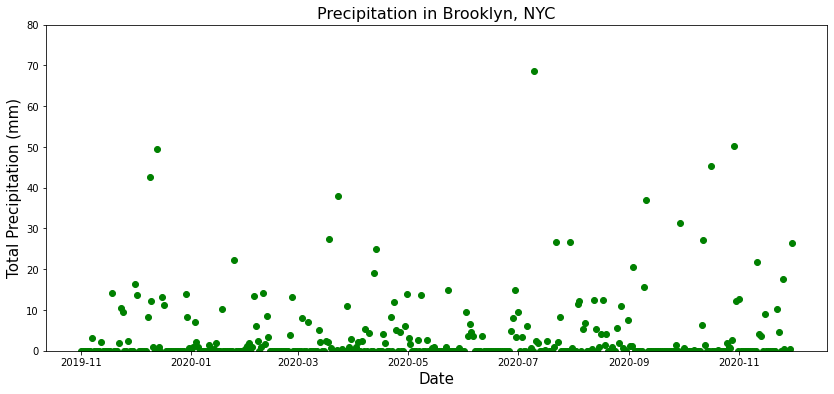

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

precipitation = ee_array_to_df(precipnyc,['pr'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(precipitation['datetime'], precipitation['pr'], c = 'green', alpha = 1)
ax.set_title('Precipitation in Brooklyn, NYC', fontsize = 16)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Total Precipitation (mm)', fontsize = 15)
ax.set_ylim(0, 80)
plt.show()

In [ ]:
precipitation = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")
start = '2010-01-01'
end = '2010-01-01'
precipitation = precipitation.select('pr').filterDate(start, end)
region = point.buffer(1e6)
precipchart = precip.mean()
from IPython.display import Image
url = precipchart.getThumbUrl({
    'min': 0.0, 'max': 1.0, 'dimensions': 2048, 'region': region,
    'palette': ['00008B','7FFFD4','00BFFF', 'CAFF70', '00FA9A','E3CF57', 'yellow', 'orange','FF7F50', 'red', 'CD2626', '800000']
})

print(url)
Image(url=url)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/67b820b26e5a560e56fd513d8ce92921-9c7893fc24c4f19b2db4dfa90757dff5:getPixels
